In [431]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

import seaborn as sns
%matplotlib inline 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } </style>"))

In [434]:
df = pd.read_excel('/Users/lesson6_mac/Downloads/TeamProject/comb_mini.xlsx')
# df = df.drop(columns=['humi','temp','wind','rain','dew','snow'])
df['Cause'] = np.select([df['Cause']=='개인질환', df['Cause']=='낙석낙빙',df['Cause']=='산악기타',df['Cause']=='실족추락',df['Cause']=='암벽등반',\
                       df['Cause']=='일반조난',df['Cause']=='저체온증',df['Cause']=='탈진탈수'],['ill', 'rockfall', 'etc', 'drop', 'climb', 'distress', 'lowtemp', 'drained'])

In [435]:
df.head()

,Cause,humi,temp,wind,rain,dew,snow
0,distress,34.50,-12.725,3.000,0.0,-23.00,11.250
1,distress,46.25,-5.675,1.775,0.0,-14.65,8.925
2,etc,62.25,-2.900,2.475,0.0,-7.35,3.700
3,distress,59.50,-0.300,1.800,0.0,-6.00,3.525
4,distress,55.00,0.700,1.400,0.0,-5.00,3.450


In [436]:
set(df['Cause'])

{'climb', 'distress', 'drained', 'drop', 'etc', 'ill', 'lowtemp', 'rockfall'}

In [437]:
df.columns

Index(['Cause', 'humi', 'temp', 'wind', 'rain', 'dew', 'snow'], dtype='object')

In [438]:
df['Cause'] = np.where(df['Cause']=='distress', 1,0)

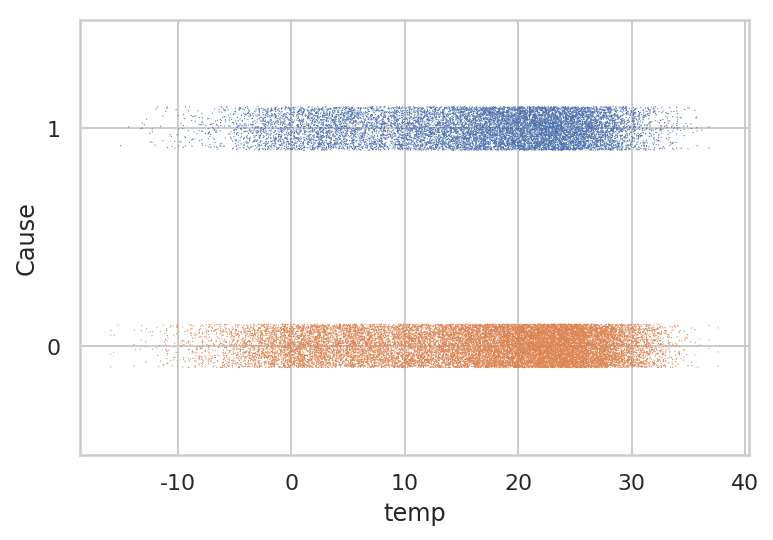

In [456]:
sns.stripplot(x="temp", y="Cause", data=df, jitter=True, orient='h', order=[1, 0], size=.6)
plt.grid(True)
plt.show()

In [439]:
df.groupby('Cause').count()

,humi,temp,wind,rain,dew,snow
Cause,,,,,,
0,19684,19682,19681,19687,19682,19687
1,11978,11972,11971,11978,11977,11978


In [440]:
df.dropna(inplace=True)
df.isna().sum()

Cause    0
humi     0
temp     0
wind     0
rain     0
dew      0
snow     0
dtype: int64

In [441]:
from statsmodels.discrete.discrete_model import Logit
model = Logit.from_formula("Cause ~ humi+ temp + wind+rain+snow", df) # dew 제외
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.658306
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Cause   No. Observations:                31648
Model:                          Logit   Df Residuals:                    31642
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Jun 2019   Pseudo R-squ.:                0.007361
Time:                        10:19:40   Log-Likelihood:                -20834.
converged:                       True   LL-Null:                       -20989.
                                        LLR p-value:                 1.158e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7303      0.053    -13.766      0.000      -0.834      -0.626
humi           0.0088      0.

In [442]:
df['predict'] = result.predict(df)

In [443]:
df.head(10)

,Cause,humi,temp,wind,rain,dew,snow,predict
0,1,34.50,-12.725,3.000,0.0,-23.000,11.250,0.163525
1,1,46.25,-5.675,1.775,0.0,-14.650,8.925,0.221251
2,0,62.25,-2.900,2.475,0.0,-7.350,3.700,0.333880
3,1,59.50,-0.300,1.800,0.0,-6.000,3.525,0.340015
4,1,55.00,0.700,1.400,0.0,-5.000,3.450,0.337982
5,1,46.50,1.875,1.900,0.0,-6.100,3.075,0.320314
6,1,44.00,2.425,1.725,0.0,-6.550,2.425,0.330997
7,1,44.00,2.425,1.725,0.0,-6.550,2.425,0.330997
8,1,43.75,2.550,1.800,0.0,-6.475,2.300,0.331810
9,1,71.00,2.950,0.925,0.0,0.250,0.000,0.453641


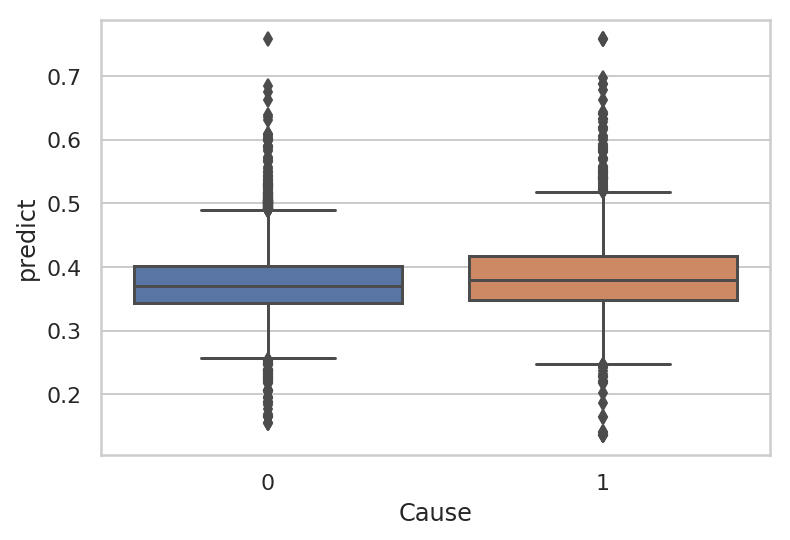

In [444]:
sns.boxplot(x="Cause", y="predict", data=df)
plt.show()

In [445]:
df1 = df.sort_values("Cause",axis=0,ascending=False).reset_index(drop=True).drop(columns="predict")

In [446]:
result.pred_table()

array([[19540.,   138.],
       [11796.,   174.]])

In [447]:
df1.where(df1["Cause"]==0).dropna()

,Cause,humi,temp,wind,rain,dew,snow
11970,0.0,55.00,22.300,0.900,0.00,13.500,0.0
11971,0.0,25.00,17.800,1.450,0.00,-1.700,0.0
11972,0.0,43.50,25.300,2.025,0.00,13.850,0.0
11973,0.0,31.50,4.825,3.300,0.00,-8.350,0.0
11974,0.0,83.00,20.250,0.825,0.00,19.400,0.0
11975,0.0,27.00,24.150,2.800,0.00,4.600,0.0
11976,0.0,48.75,-1.700,3.100,0.00,-8.475,0.0
11977,0.0,51.00,12.200,2.250,0.00,2.900,0.0
11978,0.0,66.00,24.375,1.700,0.00,19.850,0.0
11979,0.0,65.00,25.100,1.100,0.00,18.300,0.0


In [448]:
df1 = df1.loc[0:20970]

In [449]:
df1.where(df1['Cause']==1).count()

Cause    11970
humi     11970
temp     11970
wind     11970
rain     11970
dew      11970
snow     11970
dtype: int64

In [450]:
df1.where(df1['Cause']==0).count()

Cause    9001
humi     9001
temp     9001
wind     9001
rain     9001
dew      9001
snow     9001
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c3939e4e0>]],
      dtype=object)

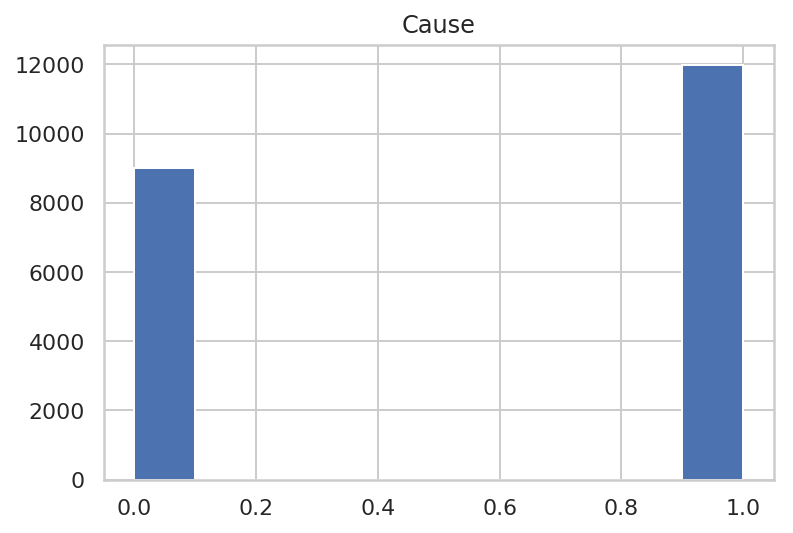

In [451]:
df1.hist(column='Cause')

In [452]:
model = Logit.from_formula("Cause ~ humi+ temp + wind + rain + snow", df1) # dew 제외
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.680416
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Cause   No. Observations:                20971
Model:                          Logit   Df Residuals:                    20965
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Jun 2019   Pseudo R-squ.:                0.003917
Time:                        10:20:04   Log-Likelihood:                -14269.
converged:                       True   LL-Null:                       -14325.
                                        LLR p-value:                 1.396e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0315      0.064     -0.493      0.622      -0.157       0.094
humi           0.0064      0.

In [453]:
model = ols("humi ~ C(Cause)", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   humi   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     241.3
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           3.30e-54
Time:                        10:20:07   Log-Likelihood:            -1.3682e+05
No. Observations:               31648   AIC:                         2.736e+05
Df Residuals:                   31646   BIC:                         2.737e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        49.9976      0.130    384.255

In [359]:
df['predict'] = result.predict(df)

In [360]:
df.head()

,Cause,humi,temp,wind,rain,dew,snow,predict
0,distress,34.50,-12.725,3.000,0.0,-23.00,11.250,53.272955
1,distress,46.25,-5.675,1.775,0.0,-14.65,8.925,53.272955
2,etc,62.25,-2.900,2.475,0.0,-7.35,3.700,51.409295
3,distress,59.50,-0.300,1.800,0.0,-6.00,3.525,53.272955
4,distress,55.00,0.700,1.400,0.0,-5.00,3.450,53.272955


In [361]:
df['error'] = df['humi']-df['predict']

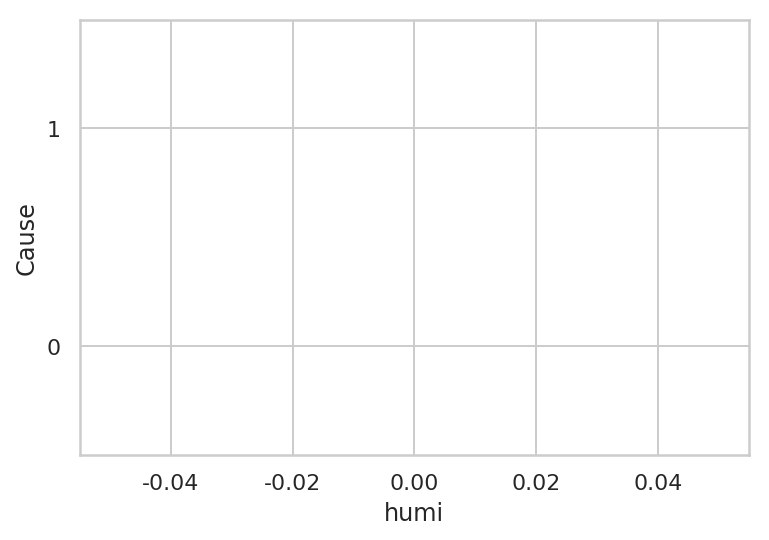

In [374]:
sns.stripplot(x="humi", y="Cause", data=df, jitter=True, orient='h', order=[1, 0], size=.5)
plt.grid(True)
plt.show()

In [258]:
df1_test = df1.loc[:,["humi","rain","snow"]]

In [297]:
df1.head(10)

,Cause,humi,temp,wind,rain,dew,snow
0,1,30.50,19.475,1.600,0.0,5.200,0.0
1,1,37.50,5.650,2.100,0.0,-6.600,0.0
2,1,32.25,11.875,3.250,0.0,-2.125,0.0
3,1,32.25,11.875,3.250,0.0,-2.125,0.0
4,1,26.00,18.950,3.400,0.0,0.250,0.0
5,1,35.00,20.250,1.000,0.0,5.300,0.0
6,1,45.50,23.425,0.975,0.0,14.150,0.0
7,1,31.00,16.700,2.300,0.0,-0.400,0.0
8,1,59.00,10.400,0.850,0.0,2.400,0.0
9,1,50.75,23.350,1.300,0.0,14.650,0.0


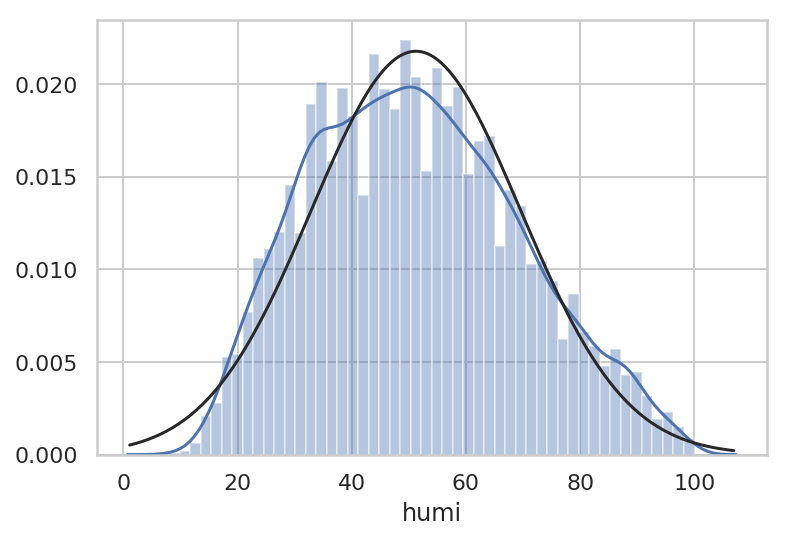

In [262]:
sns.distplot(df.humi, fit=norm)


((array([-4.08644642, -3.87568627, -3.76058121, ...,  3.76058121,
          3.87568627,  4.08644642]), array([0, 0, 0, ..., 1, 1, 1])),
 (0.3802813788238603, 0.37822295247724985, 0.7840777759165423))

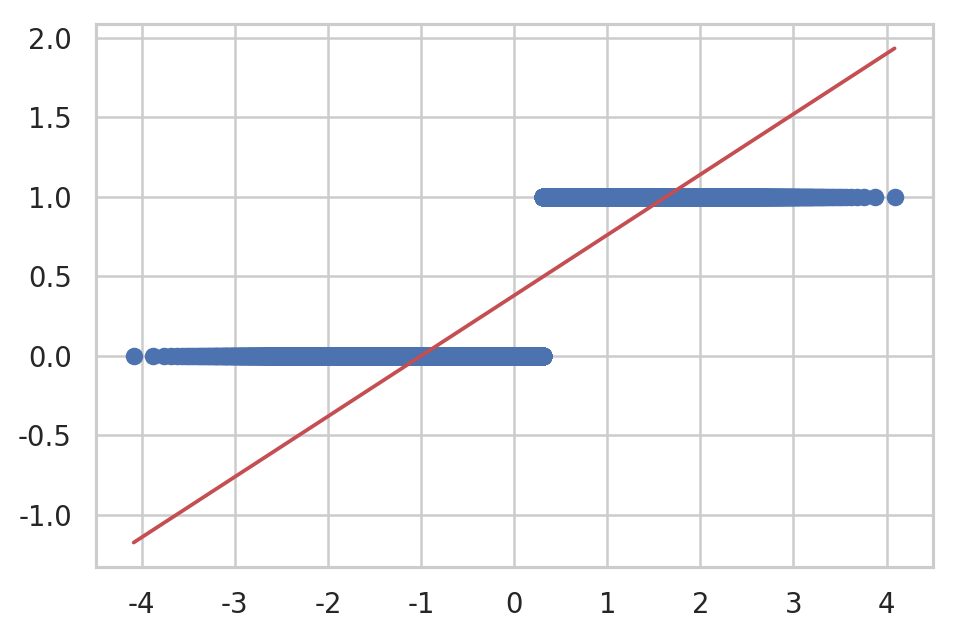

In [256]:
plt.figure(dpi=90)
stats.probplot(df['Cause'],plot=plt)

In [342]:
df.corr()

,Cause,humi,temp,wind,rain,dew,snow,predict
Cause,1.000000,0.086984,-0.000633,-0.051618,0.033808,0.041314,-0.022140,0.100284
humi,0.086984,1.000000,0.129626,-0.275151,0.204068,0.589652,0.026729,0.880652
temp,-0.000633,0.129626,1.000000,-0.103611,0.039039,0.860550,-0.244121,-0.006411
wind,-0.051618,-0.275151,-0.103611,1.000000,0.014837,-0.219688,0.012097,-0.522590
rain,0.033808,0.204068,0.039039,0.014837,1.000000,0.115601,-0.005479,0.342282
dew,0.041314,0.589652,0.860550,-0.219688,0.115601,1.000000,-0.184318,0.419918
snow,-0.022140,0.026729,-0.244121,0.012097,-0.005479,-0.184318,1.000000,-0.224151
predict,0.100284,0.880652,-0.006411,-0.522590,0.342282,0.419918,-0.224151,1.000000


In [419]:
dfr =  pd.read_excel('combined_all.xlsx',sheet_name='sheet3',header=0)
dfr.groupby('Cause').count()

,Overview,rain
Cause,,
개인질환,2859,2923
낙석낙빙,45,46
산악기타,7939,8146
실족추락,7737,7919
암벽등반,173,174
일반조난,11849,11978
저체온증,29,29
탈진탈수,438,450


In [420]:
dfr['Cause'] = np.where(dfr['Cause']=='일반조난',1,0)
dfr= dfr.drop(columns='Overview')

In [429]:
dfr = dfr[dfr['rain'] != 0]


In [430]:
dfr.head()

,Cause,rain
0,1,NaN
1,1,NaN
2,0,NaN
3,1,NaN
4,1,NaN


In [413]:
dfr['rain'].dropna(inplace= True)

AttributeError: 'Series' object has no attribute 'dropnan'

In [412]:
dfr.head()

,Cause,rain
0,1,NaN
1,1,NaN
2,0,NaN
3,1,NaN
4,1,NaN


In [386]:
model = Logit.from_formula("Cause ~ rain", dfr) 
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.662654
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Cause   No. Observations:                31665
Model:                          Logit   Df Residuals:                    31663
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Jun 2019   Pseudo R-squ.:               0.0008416
Time:                        18:21:30   Log-Likelihood:                -20983.
converged:                       True   LL-Null:                       -21001.
                                        LLR p-value:                 2.758e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5043      0.012    -43.237      0.000      -0.527      -0.481
rain           0.1059      0.